In [4]:
import os
print(os.getcwd())

C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang


In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
html = response.content
scraped = BeautifulSoup(html, 'html.parser')

In [6]:
scraped.h1

<h1>Coronavirus Cases:</h1>

In [9]:
# write your code here
unparsed_today=scraped.select('#main_table_countries_today')
#print(unparsed_today)
for country in unparsed_today:
    #country=float(country.text.lstrip("+"))
    print(country)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_co

In [10]:
# write your code here
unparsed_yesterday=scraped.select('#main_table_countries_yesterday')
#print(unparsed_yesterday)
for country in unparsed_yesterday:
    #country=float(country.text.lstrip("+"))
    print(country)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent=

In [11]:
# write your code here
unparsed_yesterday2=scraped.select('#main_table_countries_yesterday2')
#print(unparsed_yesterday)
for country in unparsed_yesterday2:
    #country=float(country.text.lstrip("+"))
    print(country)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday2" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent

In [1]:
import pandas as pd

In [17]:
# Local html page
# html_string = pd.read_html('C:/Users/1/Desktop/W2021/Python420/python420-project1-azadeh-guang/local_html/local_page2021-03-20')

In [3]:
import os
print(os.getcwd())

C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang


In [11]:
import requests
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
response.text[:100]

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang='

In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [14]:
 class HTMLTableParser:
       
        def parse_url(self, url):
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'lxml')
            return [(table['id'],self.parse_html_table(table))\
                    for table in soup.find_all('table')]  
    
        def parse_html_table(self, table):
            n_columns = 0
            n_rows=0
            column_names = []
    
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                        column_names.append(th.get_text())
    
            # Safeguard on Column Titles
            if len(column_names) > 0 and len(column_names) != n_columns:
                raise Exception("Column titles do not match the number of columns")
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            row_marker = 0
            for row in table.find_all('tr'):
                column_marker = 0
                columns = row.find_all('td')
                for column in columns:
                    df.iat[row_marker,column_marker] = column.get_text()
                    column_marker += 1
                if len(columns) > 0:
                    row_marker += 1
                    
            # Convert to float if possible
            for col in df:
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    pass
            
            return df

In [29]:
hp = HTMLTableParser()
table = hp.parse_url(url)[0][1]
table.head()

#      Country,Other  TotalCases NewCases TotalDeaths NewDeaths  \
0    \nNorth America\n  35,100,972   +2,611     803,886      +222   
1    \nSouth America\n  20,018,966     +223     518,169        +9   
2             \nAsia\n  26,971,999   +5,294     416,488       +21   
3           \nEurope\n  37,574,111              877,864             
4           \nAfrica\n   4,138,592              110,143             

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0     26,557,551       +3,070   7,739,535           15,135                    
1     17,842,145         +650   1,658,652           19,600                    
2     25,085,082       +2,607   1,470,429           24,301                    
3     26,566,965               10,129,282           28,565                    
4      3,697,455                  330,994            2,578                    

  Deaths/1M pop TotalTests Tests/\n1M pop\n Population      Continent  \
0                                                       North America   
1                                                       South America   
2                                                                Asia   
3                                                              Europe   
4                                                              Africa   

  1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  
0                \n                                       
1                \n                                       
2                \n                                       
3                \n                                       
4                \n

In [16]:
hp.parse_url(url)

[('main_table_countries_today',
      #       Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
  0       \nNorth America\n   35,098,361              803,664             
  1       \nSouth America\n   20,018,149     +223     518,159        +9   
  2                \nAsia\n   26,967,122     +417     416,468        +1   
  3              \nEurope\n   37,574,111              877,864             
  4              \nAfrica\n    4,138,592              110,143             
  ..  ..                ...          ...      ...         ...       ...   
  232                Total:   37,574,111              877,864             
  233                Total:    4,138,592              110,143             
  234                Total:       53,848      +18       1,115             
  235                Total:          721                   15             
  236                Total:  123,850,904     +658   2,727,428       +10   
  
      TotalRecovered NewRecovered ActiveCases Serious,Critical To

In [30]:
#soup = BeautifulSoup(response.text, 'lxml')

In [31]:
#table = soup.find_all('table')[0]

In [32]:
#table

In [33]:
#row_marker=0
#for row in table.find_all('tr'):
 #   column_marker=0
  #  columns=row.find_all('td')
   # for column in columns:
    #    new_table.iat[row_marker,column_marker]=column.get_text()
     #   column_marker+=1
    #new_table

Text(0.5, 1.0, 'Total Cases Plot')

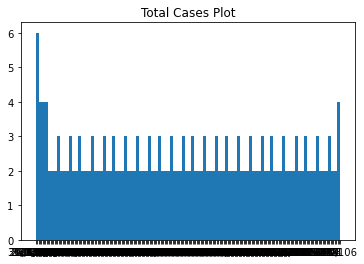

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
    
plt.figure()
avg=table['TotalCases'].values
plt.hist(avg, bins = 100)
plt.title('Total Cases Plot')


Text(0.5, 1.0, 'Total Deaths Plot')

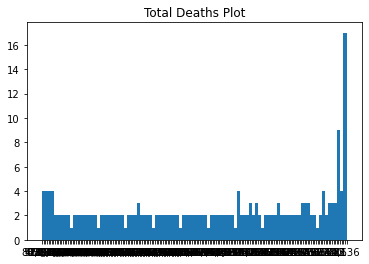

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
    
plt.figure()
avg=table['TotalDeaths'].values
plt.hist(avg, bins = 100)
plt.title('Total Deaths Plot')


In [10]:
# Read JSON file to DataFrame
import pandas as pd
df = pd.read_json('countries_json/country_neighbour_dist_file.json')
df.dropna(subset=['Canada'])

Abkhazia Afghanistan Albania Algeria Andorra Antigua and Barbuda Argentina  \
30      NaN         NaN     NaN     NaN     NaN                 NaN       NaN   

   Armenia Australia Austria  ... Uruguay Uzbekistan Vanuatu Vatican City  \
30     NaN       NaN     NaN  ...     NaN        NaN     NaN          NaN   

   Venezuela Vietnam Western Sahara Yemen Zambia Zimbabwe  
30       NaN     NaN            NaN   NaN    NaN      NaN  

[1 rows x 198 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 198 entries, Abkhazia to Zimbabwe
dtypes: object(198)
memory usage: 306.4+ KB


In [13]:
import json
import pandas as pd
from pandas.io.json import json_normalize

with open ('countries_json/country_neighbour_dist_file.json','r') as f:
    data = json.loads(f.read())
df = pd.json_normalize(data)

In [14]:
df

Abkhazia.Russia  Abkhazia.Georgia  \
0              241.0             141.0   
1                NaN               NaN   
2                NaN               NaN   
3                NaN               NaN   
4                NaN               NaN   
..               ...               ...   
193              NaN               NaN   
194              NaN               NaN   
195              NaN               NaN   
196              NaN               NaN   
197              NaN               NaN   

     Afghanistan.People's Republic of China  Afghanistan.Iran  \
0                                       NaN               NaN   
1                                      76.0             935.0   
2                                       NaN               NaN   
3                                       NaN               NaN   
4                                       NaN               NaN   
..                                      ...               ...   
193                                     NaN               NaN   
194                                     NaN               NaN   
195                                     NaN               NaN   
196                                     NaN               NaN   
197                                     NaN               NaN   

     Afghanistan.Pakistan  Afghanistan.Tajikistan  Afghanistan.Turkmenistan  \
0                     NaN                     NaN                       NaN   
1                  2430.0                  1206.0                     744.0   
2                     NaN                     NaN                       NaN   
3                     NaN                     NaN                       NaN   
4                     NaN                     NaN                       NaN   
..                    ...                     ...                       ...   
193                   NaN                     NaN                       NaN   
194                   NaN                     NaN                       NaN   
195                   NaN                     NaN                       NaN   
196                   NaN                     NaN                       NaN   
197                   NaN                     NaN                       NaN   

     Afghanistan.Uzbekistan  Afghanistan.India  Afghanistan.Kashmir  ...  \
0                       NaN                NaN                  NaN  ...   
1                     137.0                0.0                  0.0  ...   
2                       NaN                NaN                  NaN  ...   
3                       NaN                NaN                  NaN  ...   
4                       NaN                NaN                  NaN  ...   
..                      ...                ...                  ...  ...   
193                     NaN                NaN                  NaN  ...   
194                     NaN                NaN                  NaN  ...   
195                     NaN                NaN                  NaN  ...   
196                     NaN                NaN                  NaN  ...   
197                     NaN                NaN                  NaN  ...   

     Zambia.Democratic Republic of the Congo  Zambia.Malawi  \
0                                        NaN            NaN   
1                                        NaN            NaN   
2                                        NaN            NaN   
3                                        NaN            NaN   
4                                        NaN            NaN   
..                                       ...            ...   
193                                      NaN            NaN   
194                                      NaN            NaN   
195                                      NaN            NaN   
196                                   1930.0          837.0   
197                                      NaN            NaN   

     Zambia.Mozambique  Zambia.Namibia  Zambia.Tanzania  Zambia.Zimbabwe  \
0                  NaN  

In [21]:
import requests
from bs4 import BeautifulSoup
import os
import codecs

# Obtain current directory path
current_dir = os.getcwd()
# Get directory path for json file
json_dir = os.path.join(current_dir, 'countries_json\\country_neighbour_dist_file.json')
html17_dir = os.path.join(current_dir,'local_html\\local_page2021-03-17.html')
html20_dir = os.path.join(current_dir, 'local_html\\local_page2021-03-20.html')
print(html17_dir)
file17 = codecs.open(html17_dir,"r", "utf-8")
html17 = file17.read()
scraped17 = BeautifulSoup(html17,'html.parser')

C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang\local_html\local_page2021-03-17.html


In [22]:
scraped17.find('table')

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_co

In [16]:
file20 = codecs.open(html20_dir,"r", "utf-8")
html20 = file20.read()
scraped20 = BeautifulSoup(html20,'html.parser')
#html = open('local_html/local_page2021-03-17.html').read()
#scraped = BeautifulSoup(html, 'html.parser')

In [20]:
scraped20.select('#main_table_countries_yesterday2')

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday2" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>
 </thead>
 <tbody>
 <tr class="total_row_world row

In [1]:
from scrape_module import scrapping
scrapped = scrapping()
print(scrapped.get_filename())

Enter day only (1-31):
15
<class 'int'>
Enter day only (1-31):
31
<class 'int'>
None


In [2]:
print(scrapped.file_dir)

C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang\local_html\local_page2021-03-17.html


In [1]:
from scrape_module import scrapping
scrapped = scrapping()

Enter day only (1-31):
16


In [2]:
scrapped.save_df()

In [2]:
import os
# MySQL connection
x=input("please enter the number of day") 
path=os.path.join(os.getcwd(),"local_html")
filename1=os.path.join(path,"local_page2021-03-"+x)
filename2=os.path.join(path,"local_page2021-03-"+str(int(x)+3))
                           
url1="file:///"+filename1+".html"
url2="file:///"+filename2+".html"

please enter the number of day17


In [3]:
host='localhost'
os.environ['user'] = 'admin'
os.environ['passwd'] = 'password'
user = os.getenv('user')
passwd = os.getenv('passwd')
from sql_lab_test import Sqlpart
sobj=Sqlpart(host,user,passwd)

In [4]:
from file import FILEIO
# Obtain current directory path
current_dir = os.getcwd()
# Get directory path for json file
json_dir = os.path.join(current_dir, 'countries_json\\country_neighbour_dist_file.json')
js=FILEIO(json_dir) 
js.readFromFile() 
js.readvalue()          
js.populate()           

In [7]:
#sobj.create_db_tables_keys(url1,url2)       
#sobj.colomnmaker(js.pop)  

In [9]:
import mysql.connector
coronaDatabase_name = 'covid_corona_db_ahma_zhan'
conn = mysql.connector.connect(user='admin', password='password',
                              host='localhost',
                              database= coronaDatabase_name)
crs=conn.cursor()

In [10]:
def create_table(crs,table_name ,schema):
    crs.execute('create table '+table_name+ schema+';')

In [11]:
def select_db(crs,db_name):
    crs.execute('use '+db_name)

In [12]:
db_name='covid_corona_db_ahma_zhan'

In [13]:
crs.execute('use '+db_name)

In [14]:
schema3="(Country_Other varchar(50),Distance Decimal NOT NULL ,Neigbour varchar(50) COLLATE Latin1_General_CS NOT NULL ,PRIMARY KEY(Country_Other,Neigbour))"

In [15]:
table_name='countries_border'

In [16]:
crs.execute('create table '+ table_name+' '+schema3+';')

In [17]:
import os
from file import FILEIO
# Obtain current directory path
current_dir = os.getcwd()
# Get directory path for json file
json_dir = os.path.join(current_dir, 'countries_json\\country_neighbour_dist_file.json')
js=FILEIO(json_dir) 
js.readFromFile() 
js.readvalue()          
js.populate()           

In [18]:
js.pop

[('Abkhazia', 'Russia', 241.0),
 ('Abkhazia', 'Georgia', 141.0),
 ('Afghanistan', "People's Republic of China", 76.0),
 ('Afghanistan', 'Iran', 935.0),
 ('Afghanistan', 'Pakistan', 2430.0),
 ('Afghanistan', 'Tajikistan', 1206.0),
 ('Afghanistan', 'Turkmenistan', 744.0),
 ('Afghanistan', 'Uzbekistan', 137.0),
 ('Afghanistan', 'India', 0.0),
 ('Afghanistan', 'Kashmir', 0.0),
 ('Albania', 'Greece', 282.0),
 ('Albania', 'Kosovo', 0.0),
 ('Albania', 'North Macedonia', 151.0),
 ('Albania', 'Montenegro', 172.0),
 ('Algeria', 'Libya', 982.0),
 ('Algeria', 'Mali', 1376.0),
 ('Algeria', 'Mauritania', 463.0),
 ('Algeria', 'Morocco', 1559.0),
 ('Algeria', 'Niger', 956.0),
 ('Algeria', 'Tunisia', 1010.0),
 ('Algeria', 'Western Sahara', 0.0),
 ('Andorra', 'France', 56.6),
 ('Andorra', 'Spain', 63.7),
 ('Argentina', 'Bolivia', 832.0),
 ('Argentina', 'Brazil', 1224.0),
 ('Argentina', 'Chile', 0.0),
 ('Argentina', 'Paraguay', 1880.0),
 ('Argentina', 'Uruguay', 579.0),
 ('Armenia', 'Azerbaijan', 0.0),
 

In [19]:
type(sobj)

sql_lab_test.Sqlpart

In [20]:
sobj.create_db_tables_keys(url1,url2)       
#sobj.colomnmaker(js.pop)  

OperationalError: MySQL Connection not available.

In [21]:
host='localhost'
os.environ['user'] = 'admin'
os.environ['passwd'] = 'password'
user = os.getenv('user')
passwd = os.getenv('passwd')
from sql_lab import Sqlpart
sobj=Sqlpart(host,user,passwd)

In [22]:
sobj

In [23]:
type(sobj)

sql_lab.Sqlpart

In [24]:
sobj.create_db_tables_keys(url1,url2)   

In [25]:
sobj.colomnmaker(js.pop)

OperationalError: MySQL Connection not available.

In [26]:
js.pop

[('Abkhazia', 'Russia', 241.0),
 ('Abkhazia', 'Georgia', 141.0),
 ('Afghanistan', "People's Republic of China", 76.0),
 ('Afghanistan', 'Iran', 935.0),
 ('Afghanistan', 'Pakistan', 2430.0),
 ('Afghanistan', 'Tajikistan', 1206.0),
 ('Afghanistan', 'Turkmenistan', 744.0),
 ('Afghanistan', 'Uzbekistan', 137.0),
 ('Afghanistan', 'India', 0.0),
 ('Afghanistan', 'Kashmir', 0.0),
 ('Albania', 'Greece', 282.0),
 ('Albania', 'Kosovo', 0.0),
 ('Albania', 'North Macedonia', 151.0),
 ('Albania', 'Montenegro', 172.0),
 ('Algeria', 'Libya', 982.0),
 ('Algeria', 'Mali', 1376.0),
 ('Algeria', 'Mauritania', 463.0),
 ('Algeria', 'Morocco', 1559.0),
 ('Algeria', 'Niger', 956.0),
 ('Algeria', 'Tunisia', 1010.0),
 ('Algeria', 'Western Sahara', 0.0),
 ('Andorra', 'France', 56.6),
 ('Andorra', 'Spain', 63.7),
 ('Argentina', 'Bolivia', 832.0),
 ('Argentina', 'Brazil', 1224.0),
 ('Argentina', 'Chile', 0.0),
 ('Argentina', 'Paraguay', 1880.0),
 ('Argentina', 'Uruguay', 579.0),
 ('Armenia', 'Azerbaijan', 0.0),
 

In [27]:
type(crs)

mysql.connector.cursor_cext.CMySQLCursor

In [30]:
for i in range(0,len(js.pop)):
    crs.execute("insert into countries_border(Country_Other,Neigbour,Distance) values "+str(js.pop[i])+";")
    conn.commit()
conn.close()

In [1]:
import mysql.connector
coronaDatabase_name = 'covid_corona_db_ahma_zhan'
conn = mysql.connector.connect(user='admin', password='password',
                              host='localhost',
                              database= coronaDatabase_name)
crs=conn.cursor()
country = 'Italy'
crs.execute('select * from countries_border;')

In [2]:
table_rows=crs.fetchall()

In [3]:
import pandas as pd
df = pd.DataFrame(table_rows)

In [4]:
df

0     1             2
0       Abkhazia   141       Georgia
1       Abkhazia   241        Russia
2    Afghanistan     0         India
3    Afghanistan   935          Iran
4    Afghanistan     0       Kashmir
..           ...   ...           ...
644       Zambia   797      Zimbabwe
645     Zimbabwe   813      Botswana
646     Zimbabwe  1231    Mozambique
647     Zimbabwe   225  South Africa
648     Zimbabwe   797        Zambia

[649 rows x 3 columns]

In [5]:
new_df = pd.read_sql('select * from countries_border', conn)

In [6]:
new_df

Country_Other  Distance      Neigbour
0        Abkhazia     141.0       Georgia
1        Abkhazia     241.0        Russia
2     Afghanistan       0.0         India
3     Afghanistan     935.0          Iran
4     Afghanistan       0.0       Kashmir
..            ...       ...           ...
644        Zambia     797.0      Zimbabwe
645      Zimbabwe     813.0      Botswana
646      Zimbabwe    1231.0    Mozambique
647      Zimbabwe     225.0  South Africa
648      Zimbabwe     797.0        Zambia

[649 rows x 3 columns]

In [7]:
new_df.to_csv("countries_border.csv")

In [22]:
country = input("Enter country interested: ")
sql_str = 'select * from countries_border where Country_Other='+ '\''+str(country)+'\''
df = pd.read_sql(sql_str, conn)

Enter country interested: Italy


In [23]:
df

Country_Other  Distance      Neigbour
0         Italy     430.0       Austria
1         Italy     488.0        France
2         Italy      39.0    San Marino
3         Italy     232.0      Slovenia
4         Italy       0.0   Switzerland
5         Italy       3.0  Vatican City

In [24]:
maxborder_distance=(max(df['Distance']))

In [25]:
maxborder_country=df.loc[df['Distance']==maxborder_distance, 'Neigbour'].item()

In [26]:
maxborder_country

'France'

In [27]:
type(maxborder_country)

str

In [28]:
df_0315 = pd.read_csv('corona_tables/corona2021-03-15.csv')
df_0315['NewCases']=df_0315['NewCases'].str.strip('+')
df_0315['NewCases']=(df_0315['NewCases'].replace(',','', regex=True).astype(float))
df_0315['NewDeaths']=(df_0315['NewDeaths'].replace(',','', regex=True).astype(float))
df_0315['Totdeath1M']=(df_0315['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0315.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths  NewDeaths  \
0           8   China      90,049       5.0      4,636         NaN   
1           9     USA  30,178,753   46391.0    548,119       831.0   
2          10  Brazil  11,525,477   42107.0    279,602      1275.0   
3          11   India  11,409,595   24437.0    158,892       130.0   
4          12  Russia   4,400,045    9437.0     92,494       404.0   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0         85,238          +13         175           NaN        63         3.0   
1     22,271,223      +99,404   7,359,411         9,286    90,798      1649.0   
2     10,111,954      +48,146   1,133,921         8,318    53,952      1309.0   
3     11,025,631      +20,186     225,072         8,944     8,211       114.0   
4      4,003,576       +8,267     303,975         2,300    30,142       634.0   

    TotalTests  Tottest1M      Population  
0  160,000,000    111,163  1,439,323,776   
1  381,560,633  1,147,988    332,373,250   
2   28,600,000    133,879    213,625,776   
3  227,407,413    163,653  1,389,567,944   
4  115,500,000    791,211    145,978,750

In [29]:
df_0316 = pd.read_csv('corona_tables/corona2021-03-16.csv')
df_0316['NewCases']=df_0316['NewCases'].str.strip('+')
df_0316['NewCases']=(df_0316['NewCases'].replace(',','', regex=True).astype(float))
df_0316['Totdeath1M']=(df_0316['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0316.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths NewDeaths  \
0           8   China      90,062      13.0      4,636        NaN   
1           9     USA  30,232,095   53342.0    549,368     +1,249   
2          10  Brazil  11,609,601   84124.0    282,400     +2,798   
3          11   India  11,438,464   28869.0    159,079       +187   
4          12  Russia   4,409,438    9393.0     92,937       +443   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0         85,244           +6         182           NaN        63         3.0   
1     22,358,535      +87,312   7,324,192         9,285    90,958      1653.0   
2     10,204,541      +92,587   1,122,660         8,318    54,346      1322.0   
3     11,043,377      +17,746     236,008         8,944     8,232       114.0   
4      4,014,220      +10,644     302,281         2,300    30,206       637.0   

    TotalTests  Tottest1M      Population  
0  160,000,000    111,163  1,439,323,776   
1  382,571,924  1,151,031    332,373,250   
2   28,600,000    133,879    213,625,776   
3  228,280,763    164,282  1,389,567,944   
4  115,700,000    792,581    145,978,750

In [30]:
df_0317 = pd.read_csv('corona_tables/corona2021-03-17.csv')
df_0317['NewCases']=df_0317['NewCases'].str.strip('+')
df_0317['NewCases']=(df_0317['NewCases'].replace(',','', regex=True).astype(float))
df_0317['Totdeath1M']=(df_0317['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0317.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths NewDeaths  \
0           8     USA  30,288,789   56694.0    550,537     +1,169   
1           9  Brazil  11,693,838   84237.0    284,775     +2,375   
2          10   India  11,473,946   35482.0    159,249       +170   
3          11  Russia   4,418,436    8998.0     93,364       +427   
4          12      UK   4,274,579    5758.0    125,831       +141   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0     22,443,240      +84,705   7,295,012         9,347    91,129      1656.0   
1     10,287,057      +82,516   1,122,006         8,318    54,740      1333.0   
2     11,060,951      +17,574     253,746         8,944     8,257       115.0   
3      4,024,975      +10,755     300,097         2,300    30,268       640.0   
4      3,568,271      +19,540     580,477           968    62,734      1847.0   

    TotalTests  Tottest1M      Population  
0  383,870,812  1,154,939    332,373,250   
1   28,600,000    133,879    213,625,776   
2  229,249,784    164,979  1,389,567,944   
3  116,000,000    794,636    145,978,750   
4  107,731,965  1,581,087     68,137,890

In [31]:
df_0318 = pd.read_csv('corona_tables/corona2021-03-18.csv')
df_0318['NewCases']=df_0318['NewCases'].str.strip('+')
df_0318['NewCases']=(df_0318['NewCases'].replace(',','', regex=True).astype(float))
df_0318['Totdeath1M']=(df_0318['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0318.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths NewDeaths  \
0           8   China      90,072       6.0      4,636        NaN   
1           9     USA  30,359,806   63555.0    552,817     +1,390   
2          10  Brazil  11,787,600   87169.0    287,795     +2,659   
3          11   India  11,513,945   39643.0    159,405       +155   
4          12  Russia   4,428,239    9803.0     93,824       +460   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0         85,267          +13         169           NaN        63         3.0   
1     22,523,902      +76,589   7,283,087         9,044    91,337      1663.0   
2     10,339,432      +52,375   1,160,373         8,318    55,174      1347.0   
3     11,081,508      +20,338     273,032         8,944     8,285       115.0   
4      4,037,036      +12,061     297,379         2,300    30,335       643.0   

    TotalTests  Tottest1M      Population  
0  160,000,000    111,163  1,439,323,776   
1  385,654,078  1,160,230    332,394,423   
2   28,600,000    133,869    213,642,264   
3  230,313,163    165,727  1,389,716,105   
4  116,300,000    796,688    145,979,432

In [32]:
df_0319 = pd.read_csv('corona_tables/corona2021-03-19.csv')
df_0319['NewCases']=df_0319['NewCases'].str.strip('+')
df_0319['NewCases']=(df_0319['NewCases'].replace(',','', regex=True).astype(float))
df_0319['Totdeath1M']=(df_0319['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0319.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths NewDeaths  \
0           8   China      90,083      11.0      4,636        NaN   
1           9     USA  30,426,219   66413.0    554,079     +1,262   
2          10  Brazil  11,877,009   89409.0    290,525     +2,730   
3          11   India  11,554,895   40950.0    159,594       +189   
4          12  Russia   4,437,938    9699.0     94,267       +443   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0         85,283          +16         164           NaN        63         3.0   
1     22,610,368      +86,466   7,261,772         8,881    91,536      1667.0   
2     10,383,460      +44,028   1,203,024         8,318    55,593      1360.0   
3     11,105,149      +23,641     290,152         8,944     8,315       115.0   
4      4,049,373      +12,337     294,298         2,300    30,401       646.0   

    TotalTests  Tottest1M      Population  
0  160,000,000    111,163  1,439,323,776   
1  387,305,147  1,165,197    332,394,423   
2   28,600,000    133,869    213,642,264   
3  231,370,546    166,488  1,389,716,105   
4  116,700,000    799,428    145,979,432

In [33]:
df_0320 = pd.read_csv('corona_tables/corona2021-03-20.csv')
df_0320['NewCases']=df_0320['NewCases'].str.strip('+')
df_0320['NewCases']=(df_0320['NewCases'].replace(',','', regex=True).astype(float))
df_0320['Totdeath1M']=(df_0320['Totdeath1M'].replace(',','', regex=True).astype(float))
df_0320.head()

Unnamed: 0 Country  TotalCases  NewCases TotalDeaths NewDeaths  \
0           8     USA  30,482,127   55908.0    554,871       +792   
1           9  Brazil  11,950,459   73450.0    292,856     +2,331   
2          10   India  11,598,710   43815.0    159,790       +196   
3          11  Russia   4,447,570    9632.0     94,659       +392   
4          12      UK   4,291,271    5587.0    126,122        +96   

  TotalRecovered NewRecovered ActiveCases CriticalCases Totcase1M  Totdeath1M  \
0     22,683,617      +73,249   7,243,639         8,725    91,705      1669.0   
1     10,419,393      +35,933   1,238,210         8,318    55,937      1371.0   
2     11,128,119      +22,970     310,801         8,944     8,346       115.0   
3      4,060,652      +11,279     292,259         2,300    30,467       648.0   
4      3,650,226      +28,733     514,923           830    62,976      1851.0   

    TotalTests  Tottest1M      Population  
0  388,699,199  1,169,391    332,394,423   
1   28,600,000    133,869    213,642,264   
2  232,431,517    167,251  1,389,716,105   
3  117,000,000    801,483    145,979,432   
4  112,493,147  1,650,869     68,141,779

In [34]:
df_lst = [df_0315, df_0316, df_0317, df_0318, df_0319, df_0320]

In [35]:
country_newcases = []
bordercountry_newcases = []
for cdf in df_lst:
    cnewcase = cdf.loc[cdf['Country']==country,'NewCases'].item()
    country_newcases.append(cnewcase)
    bcnewcase = cdf.loc[cdf['Country']==maxborder_country,'NewCases'].item()
    bordercountry_newcases.append(bcnewcase)

In [36]:
country_newcases

[15247.0, 20377.0, 23059.0, 24907.0, 25816.0, 23832.0]

In [37]:
bordercountry_newcases

[6471.0, 29975.0, 38501.0, 34998.0, 35070.0, 35345.0]

In [38]:
for i in range(0, len(country_newcases)):
    country_newcases[i]=int(country_newcases[i])

In [39]:
index=['03-15','03-16','03-17','03-18','03-19','03-20']

In [40]:
newcases_df = pd.DataFrame({'Newcases-Italy':country_newcases,'Newcases-France':bordercountry_newcases}, index=index)

Text(0, 0.5, 'Newcases')

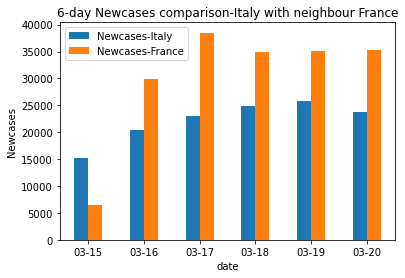

In [46]:
ax = newcases_df.plot.bar(rot=0, title='6-day Newcases comparison-Italy with neighbour France')
ax.set_xlabel("date")
ax.set_ylabel("Newcases")

Text(0, 0.5, 'Newcases')

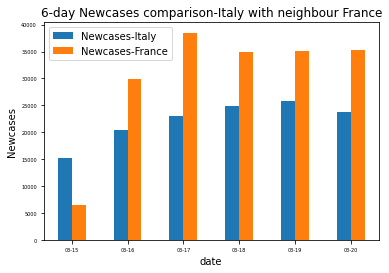

In [49]:
ax = newcases_df.plot.bar(rot=0, title='6-day Newcases comparison-Italy with neighbour France', fontsize=5)
ax.set_xlabel("date")
ax.set_ylabel("Newcases")

In [51]:
# find 3 neighbour countries with longest borders
#bcountries=df.loc[df['Distance']==maxborder_distance, 'Neigbour'].item()
df=df.sort_values(by='Distance', ascending=False)
df

Country_Other  Distance      Neigbour
1         Italy     488.0        France
0         Italy     430.0       Austria
3         Italy     232.0      Slovenia
2         Italy      39.0    San Marino
5         Italy       3.0  Vatican City
4         Italy       0.0   Switzerland

In [52]:
bcountries = []
for i in range(0, 3):
    bc=df.iloc[i][2]
    bcountries.append(bc)

In [53]:
bcountries

['France', 'Austria', 'Slovenia']

In [54]:
country_totdeath1M = []
for cdf in df_lst:
    ctotdeath1M = cdf.loc[cdf['Country']==country,'Totdeath1M'].item()
    country_totdeath1M.append(ctotdeath1M)

In [55]:
country_totdeath1M

[1697.0, 1705.0, 1712.0, 1720.0, 1726.0, 1733.0]

In [56]:
france_totdeath1M = []
for cdf in df_lst:    
    bctotdeath1M = cdf.loc[cdf['Country']=='France','Totdeath1M'].item()
    france_totdeath1M.append(bctotdeath1M)

In [57]:
france_totdeath1M

[1389.0, 1395.0, 1399.0, 1402.0, 1407.0, 1410.0]

In [58]:
austria_totdeath1M = []
for cdf in df_lst:    
    bctotdeath1M = cdf.loc[cdf['Country']=='Austria','Totdeath1M'].item()
    austria_totdeath1M.append(bctotdeath1M)

In [59]:
austria_totdeath1M

[983.0, 987.0, 990.0, 993.0, 998.0, 1001.0]

In [60]:
slovenia_totdeath1M = []
for cdf in df_lst:    
    bctotdeath1M = cdf.loc[cdf['Country']=='Slovenia','Totdeath1M'].item()
    slovenia_totdeath1M.append(bctotdeath1M)

In [61]:
slovenia_totdeath1M

[1894.0, 1895.0, 1899.0, 1900.0, 1905.0, 1908.0]

In [62]:
totdeath1M_df = pd.DataFrame({'Totdeath1M-Italy':country_totdeath1M,'Totdeath1M-France':france_totdeath1M,'Totdeath1M-Austria':austria_totdeath1M,'Totdeath1M-Slovenia':slovenia_totdeath1M}, index=index)

Text(0, 0.5, 'Deaths/1M pop')

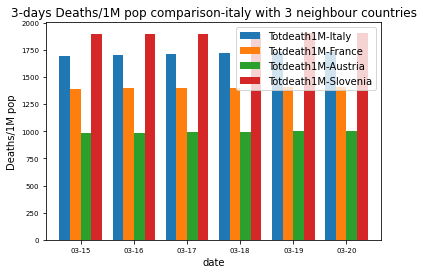

In [65]:
ax = totdeath1M_df.plot.bar(rot=0, fontsize=7, width=0.8, title='3-days Deaths/1M pop comparison-italy with 3 neighbour countries')
ax.set_xlabel("date")
ax.set_ylabel("Deaths/1M pop")

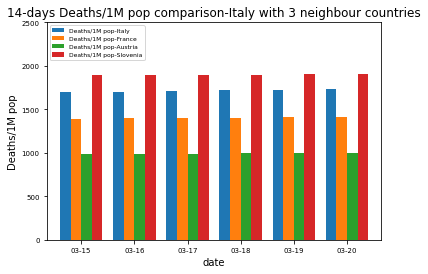

In [71]:
totdeath1M_df = pd.DataFrame({'Deaths/1M pop-Italy':country_totdeath1M,'Deaths/1M pop-France':france_totdeath1M,'Deaths/1M pop-Austria':austria_totdeath1M,'Deaths/1M pop-Slovenia':slovenia_totdeath1M}, index=index)
ax3 = totdeath1M_df.plot.bar(rot=0, fontsize=7, width=0.8, title='14-days Deaths/1M pop comparison-Italy with 3 neighbour countries')
ax3.set_xlabel("date")
ax3.set_ylabel("Deaths/1M pop")
ax3.set_ylim([0,2500])
ax3.legend(loc=2, prop={'size':6})

In [68]:
import os
host='localhost'
os.environ['user'] = 'admin'
os.environ['passwd'] = 'password'
user = os.getenv('user')
passwd = os.getenv('passwd')
from sql_lab import Sqlpart
sobj=Sqlpart(host,user,passwd)

In [69]:
x=input("please enter the number of day") 
path=os.path.join(os.getcwd(),"local_html")
filename1=os.path.join(path,"local_page2021-03-"+x)
filename2=os.path.join(path,"local_page2021-03-"+str(int(x)+3))
                           
url1="file:///"+filename1+".html"
url2="file:///"+filename2+".html"

please enter the number of day17


In [70]:
sobj.create_db_tables_keys(url1,url2)

In [71]:
print(url1)

file:///C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang\local_html\local_page2021-03-17.html


In [64]:
from ScrapeClass import Scrape
scrapeobj=Scrape(url1)
webscrape=scrapeobj.bsomaker()

In [65]:
def populate_table(crs , table_name,lst_field,lst_value,format_str ):
    insert_stm=('insert into '+table_name + lst_field +' values '+format_str)
    crs.executemany(insert_stm,lst_value)
    crs.fetchall()

In [66]:
table = webscrape.find(id='main_table_countries_today')
rows = table.find_all('tr')
#finallis=scrapeobj.rows(webscrape,'main_table_countries_today')
finallis=scrapeobj.tuplerow(rows)
format_str1='("2021-03-17",%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
tuple1=scrapeobj.finallist
table_name='corona_table'
lst_field1='(Scrapedate , ranking,Country_Other ,Total_Case,New_Cases , Total_Death , New_Deaths  ,Total_Recovered  ,New_Recovered,Active_Cases ,Serious_Critical ,Tot_Cases_1M_pop ,Deaths_1M_pop, Total_Tests, Tests_1m_pop ,Population )'

#populate_table(crs , 'corona_table',lst_field1,tuple1,format_str1 )

KeyError: 0

In [46]:
finallis

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">New<br>Recovered</br></th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>34,805,457</td>
 <t

In [67]:
scrapeobj.rows(webscrape,'main_table_countries_today')

[]

In [13]:
import mysql.connector
coronaDatabase_name = 'covid_corona_db_ahma_zhan'
conn = mysql.connector.connect(user='admin', password='password',
                              host='localhost',
                              database= coronaDatabase_name)
crs=conn.cursor()

In [34]:
table_name='corona_table'
schema='(Scrapedate date  NOT NULL ,ranking  int(5) ,\
        Country_Other varchar(50) NOT NULL,Total_Case int(15) ,\
        New_Cases int(15) , Total_Death int(15), New_Deaths int(15) ,Total_Recovered int(15) ,New_Recovered int(15),Active_cases int(15),Serious_Critical int(15),\
        Tot_Cases_1M_pop int(15),Deaths_1M_pop int(15), Total_Tests int(15), Tests_1m_pop int(15),Population int(15),PRIMARY KEY (Scrapedate ,Country_Other));'
crs.execute('create table '+table_name+ ' '+schema+';')

In [49]:
from scrape_module import scrapping
scrapped = scrapping()

Enter day only (1-31):
17


In [61]:
rows = scrapped.get_rows()
date = '2021-03-17'
table_data = []
for row in rows:
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
        
    if(len(row_data) > 0):
        data_item = {
                        "Scrapedate": date,
                        "ranking": row_data[0],
                        "Country": row_data[1],
                        "TotalCases": row_data[2],
                        "NewCases": row_data[3],
                        "TotalDeaths": row_data[4],
                        "NewDeaths": row_data[5],
                        "TotalRecovered": row_data[6],
                        "NewRecovered": row_data[7],
                        "ActiveCases": row_data[8],
                        "CriticalCases": row_data[9],
                        "Totcase1M": row_data[10],
                        "Totdeath1M": row_data[11],
                        "TotalTests": row_data[12],
                        "Tottest1M": row_data[13],
                        "Population": row_data[14]
            }
        #populate_table(crs , 'corona_table',lst_field1,data_item,format_str1 )
        table_data.append(data_item)
            

In [56]:
table_data

[{'Scrapedate': '2021-03-17',
  'ranking': '',
  'Country': '\nNorth America\n',
  'TotalCases': '34,805,457',
  'NewCases': '+64,215',
  'TotalDeaths': '795,773',
  'NewDeaths': '+1,436',
  'TotalRecovered': '26,200,876',
  'NewRecovered': '+93,478',
  'ActiveCases': '7,808,808',
  'CriticalCases': '15,791',
  'Totcase1M': '',
  'Totdeath1M': '',
  'TotalTests': '',
  'Tottest1M': '',
  'Population': ''},
 {'Scrapedate': '2021-03-17',
  'ranking': '',
  'Country': '\nSouth America\n',
  'TotalCases': '19,564,599',
  'NewCases': '+105,282',
  'TotalDeaths': '506,149',
  'NewDeaths': '+2,792',
  'TotalRecovered': '17,542,305',
  'NewRecovered': '+96,753',
  'ActiveCases': '1,516,145',
  'CriticalCases': '19,394',
  'Totcase1M': '',
  'Totdeath1M': '',
  'TotalTests': '',
  'Tottest1M': '',
  'Population': ''},
 {'Scrapedate': '2021-03-17',
  'ranking': '',
  'Country': '\nAsia\n',
  'TotalCases': '26,477,281',
  'NewCases': '+112,916',
  'TotalDeaths': '412,670',
  'NewDeaths': '+888',


In [57]:
populate_table(crs , 'corona_table',lst_field1,table_data,format_str1 )

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s),("2021-03-17",%s,%s,%s,%s,%s,%s,%s' at line 1

In [72]:
import os
print(os.getcwd())

C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang


In [3]:
import os
x=input("please enter the number of day") 
path=os.path.join(os.getcwd(),"local_html")
filename1=os.path.join(path,"local_page2021-03-"+x)
filename2=os.path.join(path,"local_page2021-03-"+str(int(x)+3))
                           
url1="file:///"+filename1+".html"
url2="file:///"+filename2+".html"

please enter the number of day17


In [4]:
print(url1)

file:///C:\Users\1\Desktop\W2021\Python420\python420-project1-azadeh-guang\local_html\local_page2021-03-17.html


In [5]:
from ScrapeClass import Scrape
scrapeobj=Scrape(url1)
webscrape=scrapeobj.bsomaker()


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 121,773,470 Cases and 2,691,030 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/fa
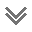

In [6]:
webscrape

In [8]:
row = scrapeobj.rows(webscrape,'main_table_countries_today')
row

[[],
 [<td></td>, <td style="text-align:left;">
  <nobr>North America</nobr>
  </td>, <td>34,805,457</td>, <td>+64,215</td>, <td>795,773</td>, <td>+1,436</td>, <td>26,200,876</td>, <td>+93,478</td>, <td>7,808,808</td>, <td>15,791</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="North America" style="display:none;">North America</td>, <td>
  </td>, <td></td>, <td></td>],
 [<td></td>,
  <td style="text-align:left;">
  <nobr>South America</nobr>
  </td>,
  <td>19,564,599</td>,
  <td>+105,282</td>,
  <td>506,149</td>,
  <td>+2,792</td>,
  <td>17,542,305</td>,
  <td>+96,753</td>,
  <td>1,516,145</td>,
  <td>19,394</td>,
  <td></td>,
  <td></td>,
  <td></td>,
  <td></td>,
  <td></td>,
  <td data-continent="South America" style="display:none;">South America</td>,
  <td>
  </td>,
  <td></td>,
  <td></td>],
 [<td></td>,
  <td style="text-align:left;">
  <nobr>Asia</nobr>
  </td>,
  <td>26,477,281</td>,
  <td>+112,916</td>,
  <td>412,670</td>,
  <td>+888</td>,
  <

In [9]:
finallis=scrapeobj.tuplerow(row)
finallis

ValueError: invalid literal for int() with base 10: 'Europe'

In [ ]:
format_str1='("2021-03-17",%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
tuple1=scrapeobj.finallist
table_name='corona_table'
lst_field1='(Scrapedate , ranking,Country_Other ,Total_Case,New_Cases , Total_Death , New_Deaths  ,Total_Recovered  ,New_Recovered,Active_Cases ,Serious_Critical ,Tot_Cases_1M_pop ,Deaths_1M_pop, Total_Tests, Tests_1m_pop ,Population )'